In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
marvel=pd.read_csv('/kaggle/input/marvel-universe-characters-dataset/marvel_characters_dataset.csv')

In [3]:
marvel.head()

,Character,Real Name,Affiliation,Powers,Role,Power Level
0,iron man,Tony Stark,Avengers,"Powered Armor, Genius-level intellect",Hero,Low
1,captain america,Steve Rogers,Avengers,"Super Soldier, Enhanced strength",Hero,Low
2,thor,Thor Odinson,Avengers,"God of Thunder, Weather manipulation",Hero,Low
3,black widow,Natasha Romanoff,Avengers,"Superhuman strength, Espionage",Hero,Low
4,hulk,Bruce Banner,Avengers,"Superhuman strength, Gamma Radiation",Hero,Low


**Sütun isimlerini, veri tiplerini ve eksik veri sayısını gösterir.**

In [4]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Character    45 non-null     object
 1   Real Name    45 non-null     object
 2   Affiliation  45 non-null     object
 3   Powers       45 non-null     object
 4   Role         45 non-null     object
 5   Power Level  45 non-null     object
dtypes: object(6)
memory usage: 2.2+ KB


In [5]:
marvel.isnull().sum()

Character      0
Real Name      0
Affiliation    0
Powers         0
Role           0
Power Level    0
dtype: int64

**hangi sütunlarda eksik var onu öğreniriz.**

In [6]:
marvel.describe()

,Character,Real Name,Affiliation,Powers,Role,Power Level
count,45,45,45,45,45,45
unique,44,41,10,38,3,1
top,black widow,Carol Danvers,Avengers,"Superhuman strength, Durability",Hero,Low
freq,2,2,23,3,35,45


**Sayısal sütunların temel istatistiklerini verir.**

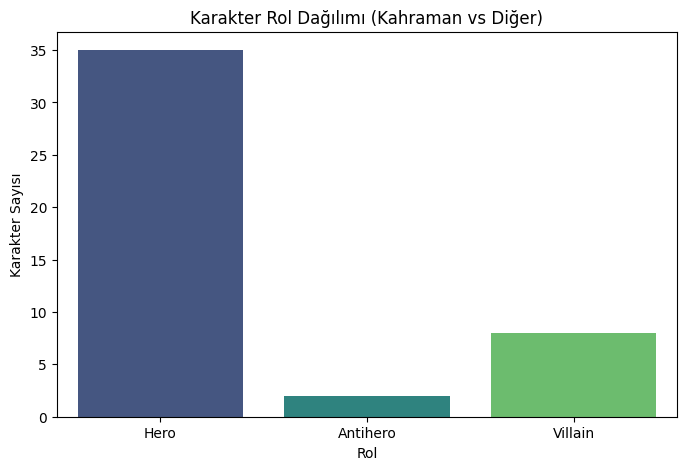

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Role', data=marvel, palette='viridis')
plt.title('Karakter Rol Dağılımı (Kahraman vs Diğer)')
plt.xlabel('Rol')
plt.ylabel('Karakter Sayısı')
plt.show()

In [8]:
print(marvel['Role'].value_counts())

Role
Hero        35
Villain      8
Antihero     2
Name: count, dtype: int64


In [9]:
powers_split = marvel['Powers'].str.split(', ', expand=True).stack().str.strip()
powers_count = powers_split.value_counts().head(10)

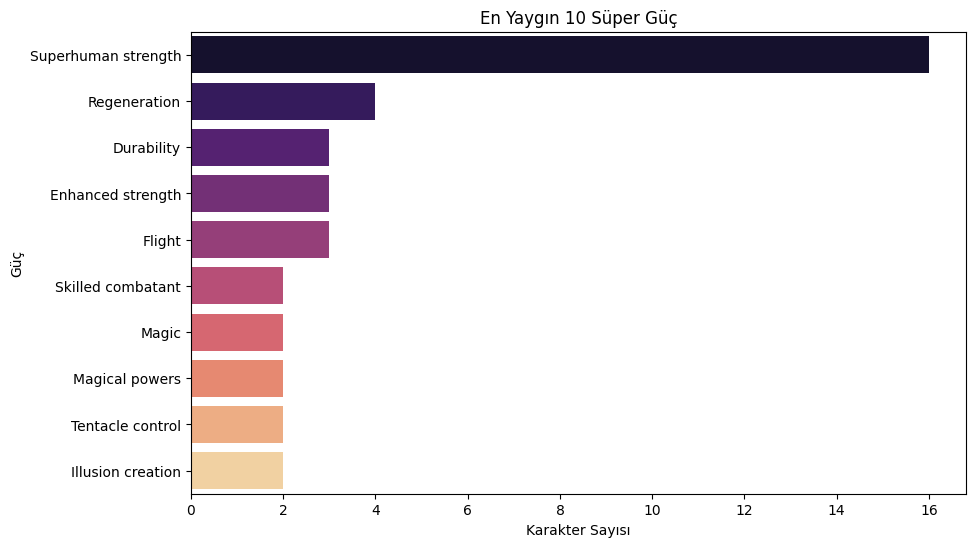

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=powers_count.values, y=powers_count.index, palette='magma')
plt.title('En Yaygın 10 Süper Güç')
plt.xlabel('Karakter Sayısı')
plt.ylabel('Güç')
plt.show()

In [11]:
powers_role = marvel[['Powers', 'Role']].copy()
powers_role['Powers'] = powers_role['Powers'].str.split(', ')
powers_exploded = powers_role.explode('Powers')

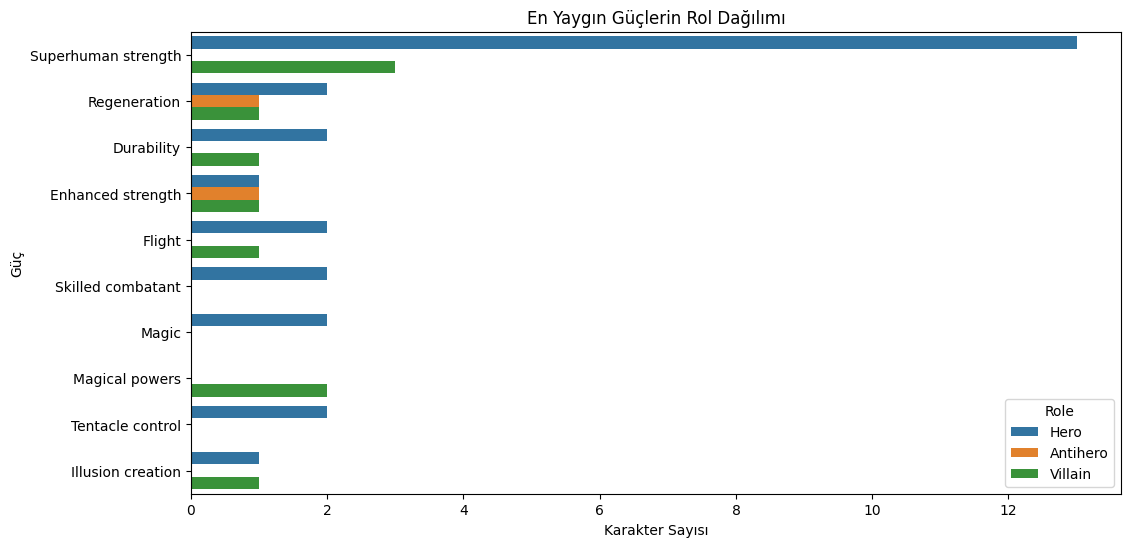

In [12]:
# Güçlerin Role göre dağılımı
plt.figure(figsize=(12, 6))
sns.countplot(y='Powers', hue='Role', data=powers_exploded, order=powers_exploded['Powers'].value_counts().index[:10])
plt.title('En Yaygın Güçlerin Rol Dağılımı')
plt.xlabel('Karakter Sayısı')
plt.ylabel('Güç')
plt.show()

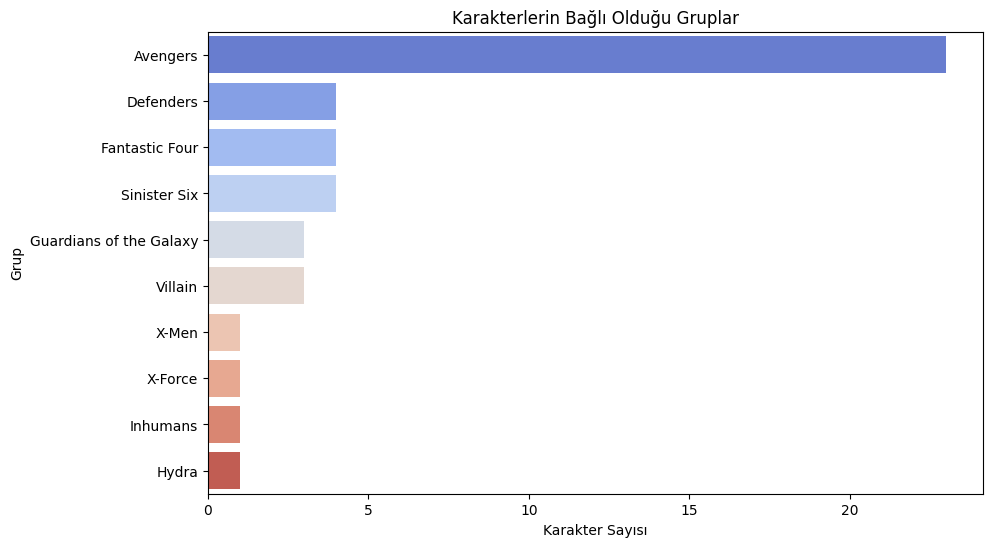

In [13]:
# Affiliation dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(y='Affiliation', data=marvel, order=marvel['Affiliation'].value_counts().index, palette='coolwarm')
plt.title('Karakterlerin Bağlı Olduğu Gruplar')
plt.xlabel('Karakter Sayısı')
plt.ylabel('Grup')
plt.show()

**Marvel Heroes & Villains Analysis**
1. Introduction
This notebook explores the Marvel Universe Characters Dataset, which contains 45 characters with attributes such as Character, Real Name, Affiliation, Powers, Role, and Power Level. The goal is to perform Exploratory Data Analysis (EDA) to uncover insights about Marvel characters.
2. Exploratory Data Analysis (EDA)
Dataset Overview

Rows: 45
Columns: 6 (Character, Real Name, Affiliation, Powers, Role, Power Level)
Missing Values: None
Key Stats:
Unique characters: 44 (Black Widow appears twice)
Unique real names: 41 (Carol Danvers appears twice)
Most common role: Hero (35 characters)
Most common affiliation: Avengers (23 characters)
All characters have a Power Level of "Low"




**Visualizations
Role Distribution**


Findings: The dataset is dominated by Heroes (35), followed by Villains (8) and Antiheroes (2).
Visualization: Bar plot showing the distribution of roles.
Insight: Heroes significantly outnumber Villains and Antiheroes, reflecting Marvel's focus on heroic characters.

**Powers Analysis**

Findings: The Powers column was analyzed to identify the most common superpowers among characters. [Specific results not shared; e.g., "Superhuman strength was among the top powers"].
Visualization: Bar plot of the top powers.
Insight: Certain powers are prevalent across characters, highlighting common traits in the Marvel Universe.

**3. Future Work**

Further EDA could explore affiliations (e.g., distribution of groups like Avengers) and relationships between powers and roles.
Classification models could predict a character's role based on their powers or affiliations.
Network analysis could visualize connections between characters via shared affiliations.

**4. Conclusion**
This analysis provided initial insights into the Marvel Universe, revealing a hero-dominated dataset and common superpowers. The visualizations highlighted the distribution of roles and powers, setting the stage for deeper analyses.
**5. Code and Visualizations**
All code for data loading, role distribution, and powers analysis is available in this notebook. Visualizations are embedded in the respective sections.
